# An Analysis on Business Analyst Jobs in Hong Kong

During my previous job as a software engineer, writing codes and dealing with data were two of the most common tasks that I would come across on a daily basis. Out of the two everyday tasks, I noticed whenever I was going through and analyzing data, I would find myself losing track of time and completely emerged in uncovering the relationships between different fields of the data. It did not take long until I realized the sort and filter functions in Microsoft Excel were a bit limiting and I knew I had to go beyond those basic functions. So I have decided to learn more about data analysis and its tools with the goal of helping businesses make accurate and data-driven decisions using meaningful insights.

# Findings

As of July 18, 2024 (date of scraping), for a Business Analyst (BA) role:

- Only 210 out of a total of 1152 (18%) jobs provided salary information. Out of the postings that provided salary info, the salary ranges from HKD\$40 (likely a typo from the job poster) to \$800,000 per month
- Regardless of years of experience (yoe), the "Information & Communication Technology" classification pays the most across all classifications with an average of HKD\$76,637 minimum, followed by "Science & Technology" with HKD\$16,750 and "Trades & Services" with HKD\$12,500.
- Regardless of yoe, the Central and Western district is one that pays the most across all districts with an average of HKD\$15,640 minimum, followed by the Hong Kong Islands district with HKD\$11,612, and the Tuen Mun district with HKD\$8,750.
- The district with the most job opportunities available is Central and Western with 220 postings, followed by Kwun Tong with 179 postings, Eastern with 115 postings, Yau Tsim Mong with 97 postings, and Wan Chai with 86 postings.
- There are 482 junior-level (0-2 yoe or accepts fresh graduates) postings (42%), 249 mid-level (3-4 yoe) postings (22%), and 275 senior-level (5 or more yoe) postings (24%).
- The most demanded minimum yoe required is 3 years (mid-level) with 193 postings (17%), followed by 5 years (senior-level) with 183 postings (16%), and 2 years (junior level) with 168 postings (15%).
- There are 291 postings (25%) hiring for multiple positions. Out of those postings, at least 124 of them (43% of the 289 postings, or 11% of the total number of postings) are hiring for multiple positions across different career levels (e.g., while one posting is looking for a "Senior Business Analyst (Digital / Mobile Projects)", this company is also accepting candidates with less experience to take on a more junior level of similar/the same role [as stated in one of the job requirements])
- Although some postings are hiring for positions across different career levels, there is still a upward trend of the higher the yoe, the higher the minimum salary

# Discussion

- Salary transparency is extremely lacking
- Even for those postings that included salary info, some of them are hiring for multiple positions across different career levels, especially the ones hiring for more senior-level positions. This makes the "Min. Years of Exp. Required" field for those postings largely inaccurate and produces huge ranges in "Min Salary" and "Max Salary" (e.g., \$500,000 to \$800,000). Without referring to other job searching platforms (e.g., Linkedin, Glassdoor, Payscale), the above factors ultimately make uncovering insights on the relationship between salary and other potentially related factors (e.g., yoe) difficult
- The source data csv included both technical and non-technical BA jobs. The requirements of technical skills in technical BA roles might be a lot demanding than non-technical ones.

# The Dataset

The dataset is from a job-scraping program written by me that scrapes a user-defined number of jobs from the search result of a partcular keyword on JobsDB.com Hong Kong. The end result of the scraping program is a csv file containing the relevant details of each keyword-matching job stored in a row (see the columns table below), which can be imported into this Notebook to perform further analysis below. Some degrees of data cleaning have already been done (e.g., removing duplicate records) in the scraping program to make data cleaning below easier and faster.

The columns:

| Column                      | null Example | non-null Example                       |
|-----------------------------|--------------|----------------------------------------|
| Title                       | -            | Business Analyst                       |
| Company                     | -            | Jobsdb - SmartHire                     |
| Min. Years of Exp. Required | (empty)      | 1                                      |
| Fresh Grad/Less Exp.        | -            | True                                   |
| Location                    | -            | Airport Area, Islands District         |
| Classification              | -            | Information & Communication Technology |
| Salary                      | (empty)      | \$25,000 - \$34,000 per month            |
| Posted Date                 | -            | 2024-07-17 14:00                       |
| Job ID                      | -            | 77344899                               |
| URL                         | -            | https://hk.jobsdb.com/job/77344899     |

In [1]:
import pandas as pd
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from pathlib import Path

In [43]:
# Define constants
INPUT_PATH = "./jobs/"
OUTPUT_PATH = "./transformed/"

# MATH CONSTANTS
IQR_SCALE = 1.5

In [3]:
# Set the max no. of rows displayed to unlimited (useful when looking at the full dataframe)
pd.set_option('display.max_rows', None)

# Set the display format of numbers in Pandas to 2 dec. places instead of having them displayed in scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display matplotlib figures inline in Juypter Notebook
%matplotlib inline
# figure(figsize=(8, 6), dpi=80)
# Set the default figure size to 8 inches x 6 inches
plt.rcParams["figure.figsize"] = (8, 6)

# Set a whitegrid background for all seaborn figures
sns.set_style("whitegrid")

In [4]:
# import the csv from the job scraping program

# Change the name of the variable below to the name of file that you want the data analyzed
csv_file = "business-analyst_20240718"
df = pd.read_csv(f"{INPUT_PATH}{csv_file}.csv")

# Data Inspection

In [5]:
df.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Location,Classification,Salary,Posted Date,Job ID,URL
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5.00,True,"Airport Area, Islands District",Information & Communication Technology,NaN,2024-07-17 14:00:00,77344899,https://hk.jobsdb.com/job/77344899
1,Business Analyst,Lively Impact Technology Limited,NaN,False,"Science Park, Tai Po District",Information & Communication Technology,"$25,000 - $34,000 per month",2024-07-17 12:00:00,77341887,https://hk.jobsdb.com/job/77341887
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1.00,False,Southern District,Information & Communication Technology,NaN,2024-07-17 06:00:00,76987834,https://hk.jobsdb.com/job/76987834
3,IT Business Analyst,FUJIFILM BI,2.00,False,"Ngau Tau Kok, Kwun Tong District",Information & Communication Technology,NaN,2024-07-17 11:00:00,77338381,https://hk.jobsdb.com/job/77338381
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3.00,True,"Sheung Wan, Central and Western District",Information & Communication Technology,NaN,2024-07-17 14:00:00,77345435,https://hk.jobsdb.com/job/77345435


In [6]:
# Inspect data types and the count of each column in pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        1152 non-null   object 
 1   Company                      1152 non-null   object 
 2   Min. Years of Exp. Required  855 non-null    float64
 3   Fresh Grad/Less Exp.         1152 non-null   bool   
 4   Location                     1152 non-null   object 
 5   Classification               1152 non-null   object 
 6   Salary                       210 non-null    object 
 7   Posted Date                  1152 non-null   object 
 8   Job ID                       1152 non-null   int64  
 9   URL                          1152 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 82.3+ KB


The data type of "Min. Years of Exp. Required" should NOT be float64. We want a int data type instead. This requires cleaning.

In [7]:
# Inspect the descriptive statistics of data
df.describe(include="all")

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Location,Classification,Salary,Posted Date,Job ID,URL
count,1152,1152,855.00,1152,1152,1152,210,1152,1152.00,1152
unique,992,588,NaN,2,76,24,119,76,NaN,1152
top,Business Analyst,Jobsdb - SmartHire,NaN,False,Central and Western District,Information & Communication Technology,"$20,000 - $30,000 per month",2024-07-17 07:00:00,NaN,https://hk.jobsdb.com/job/77344899
freq,31,40,NaN,927,90,592,10,87,NaN,1
mean,NaN,NaN,3.38,NaN,NaN,NaN,NaN,NaN,77053718.83,NaN
std,NaN,NaN,1.96,NaN,NaN,NaN,NaN,NaN,488865.53,NaN
min,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,72762416.00,NaN
25%,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,77013797.00,NaN
50%,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,77173526.50,NaN
75%,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,77282383.00,NaN


In [8]:
# Check for missing data
df.isnull().mean()

Title                         0.00
Company                       0.00
Min. Years of Exp. Required   0.26
Fresh Grad/Less Exp.          0.00
Location                      0.00
Classification                0.00
Salary                        0.82
Posted Date                   0.00
Job ID                        0.00
URL                           0.00
dtype: float64

Some values are missing in the "Min. Years of Exp. Required" and "Salary" columns.

In [9]:
# Inspect "Min. Years of Exp. Required"
df["Min. Years of Exp. Required"].value_counts()

Min. Years of Exp. Required
3.00    193
5.00    183
2.00    168
1.00    160
4.00     56
8.00     47
7.00     23
6.00     21
0.00      3
9.00      1
Name: count, dtype: int64

Most jobs requires at least 3 years of experience, followed by 5, 2, 1, etc.

In [10]:
df["Min. Years of Exp. Required"].unique()

array([ 5., nan,  1.,  2.,  3.,  4.,  0.,  6.,  7.,  8.,  9.])

"Min. Years of Exp. Required" requires some cleaning (as stated above when checking data type).

In [11]:
# Inspect "Fresh Grad/Less Exp."
df["Fresh Grad/Less Exp."].value_counts()

Fresh Grad/Less Exp.
False    927
True     225
Name: count, dtype: int64

Most jobs (81%) do not accept fresh graduate or those with less experience vs. those that do (19%).

In [12]:
# Inspect "Location"
df["Location"].value_counts()

Location
Central and Western District                          90
Quarry Bay, Eastern District                          85
Central, Central and Western District                 79
Hong Kong                                             76
Tsim Sha Tsui, Yau Tsim Mong District                 71
Kwun Tong, Kwun Tong District                         60
Kowloon Bay, Kwun Tong District                       56
Causeway Bay, Wan Chai District                       41
Hong Kong Island                                      36
Kwun Tong District                                    36
Wan Chai, Wan Chai District                           30
Lai Chi Kok, Sham Shui Po District                    30
Sha Tin District                                      29
Ngau Tau Kok, Kwun Tong District                      27
Sheung Wan, Central and Western District              27
Tsuen Wan District                                    24
Tsing Yi, Kwai Tsing District                         22
Kwai Hing, Kwai Tsing 

In [13]:
df["Location"].unique()

array(['Airport Area, Islands District', 'Science Park, Tai Po District',
       'Southern District', 'Ngau Tau Kok, Kwun Tong District',
       'Sheung Wan, Central and Western District',
       'Lai Chi Kok, Sham Shui Po District',
       'Kowloon Bay, Kwun Tong District', 'Central and Western District',
       'Kowloon', 'Quarry Bay, Eastern District',
       'Wong Chuk Hang, Southern District',
       'Kwai Hing, Kwai Tsing District',
       'Tsim Sha Tsui, Yau Tsim Mong District',
       'Central, Central and Western District',
       'Wan Chai, Wan Chai District', 'Hong Kong', 'Kwun Tong District',
       'Hong Kong Island', 'Kwai Chung, Kwai Tsing District',
       'Mong Kok, Yau Tsim Mong District', 'Tai Koo, Eastern District',
       'Kwun Tong, Kwun Tong District',
       'Admiralty, Central and Western District', 'New Territories',
       'Sha Tin District', 'Causeway Bay, Wan Chai District',
       'Chai Wan, Eastern District', 'Kwai Fong, Kwai Tsing District',
       'Tsue

Location also requires some cleaning. The exact location, district, and area all need to be separated into their own columns.

In [14]:
# Inspect "Classification"
df["Classification"].value_counts()

Classification
Information & Communication Technology    592
Banking & Financial Services              167
Accounting                                 67
Marketing & Communications                 55
Sales                                      48
Manufacturing, Transport & Logistics       36
Consulting & Strategy                      31
Insurance & Superannuation                 29
Construction                               26
Engineering                                16
Administration & Office Support            16
Retail & Consumer Products                 14
Human Resources & Recruitment              12
Call Centre & Customer Service              8
Real Estate & Property                      8
Advertising, Arts & Media                   6
Education & Training                        4
Science & Technology                        4
CEO & General Management                    4
Government & Defence                        3
Healthcare & Medical                        2
Trades & Services  

In [15]:
df["Classification"].unique()

array(['Information & Communication Technology', 'Accounting',
       'Banking & Financial Services',
       'Manufacturing, Transport & Logistics',
       'Marketing & Communications', 'Insurance & Superannuation',
       'Human Resources & Recruitment', 'Sales', 'Consulting & Strategy',
       'Retail & Consumer Products', 'Engineering',
       'Administration & Office Support', 'Construction',
       'Call Centre & Customer Service', 'Real Estate & Property',
       'Advertising, Arts & Media', 'Education & Training',
       'Healthcare & Medical', 'Trades & Services',
       'Science & Technology', 'Hospitality & Tourism', 'Legal',
       'Government & Defence', 'CEO & General Management'], dtype=object)

In [16]:
# Inspect "Salary"
df["Salary"].value_counts()

Salary
$20,000 - $30,000 per month           10
$40,000 - $60,000 per month            7
$30,000 - $40,000 per month            7
$40,000 - $50,000 per month            6
$30,000 - $45,000 per month            6
$20,000 - $25,000 per month            5
$18,000 - $25,000 per month            5
$25,000 - $35,000 per month            5
$20,000 - $24,999 per month            4
$70,000 - $80,000 per month            4
$35,000 - $45,000 per month            4
$45,000 - $54,999 per month            3
$0 - $0                                3
$25,000 - $30,000 per month            3
$50,000 - $60,000 per month            3
$30,000 - $35,000 per month            3
$22,000 - $28,000 per month            3
$25,000 - $34,999 per month            3
$55,000 - $65,000 per month            3
$30,000 - $32,000 per month            3
$35,000 - $40,000 per month            3
$28,000 - $35,000 per month            2
*12 + b                                2
$25k - $40k p.m.                       2
$35,000 -

In [17]:
df["Salary"].unique()

array([nan, '$25,000 - $34,000 per month', '$15,000 - $19,000 per month',
       '$25k - $40k p.m.', '$35,000 - $50,000 per month',
       'discretionary bonus', '$30000.00 - $60k p.m.', 'bonus, medical',
       'HKD 550000 - 700000 per annum', 'work from home',
       '$35,000 - $45,000 per month', '$30k - $40k p.m.',
       '$30,000 - $32,000 per month', '$18,000 - $25,000 per month',
       '$30,000 - $40,000 per month', '$15,000 - $22,000 per month',
       '$25,000 - $35,000 per month', '$55,000 - $75,000 per month',
       '$35k - $45k p.a.', '$36,000 - $46,000 per month', '35000 - 45000',
       '$40,000 - $60,000 per month', '$20,000 - $28,000 per month',
       '$30,000 - $45,000 per month', '$45,000 - $54,999 per month',
       '$38,000 - $50,000 per month', '$45k - $50k p.m.',
       '$15,000 - $18,000 per month', '$36,000 - $45,000 per month',
       '$45,000 - $60,000 per month', '$25k - $35k p.m.',
       '$40,000 - $49,217 per month', '£2500 - £3k p.m. (AUD)',
       '$7

"Salary" definitely requires some cleaning. The ranges need to be separated out into their own columns.

In [18]:
# Inspect "Posted Date"
df["Posted Date"].value_counts()

Posted Date
2024-07-17 07:00:00    87
2024-07-13 07:00:00    76
2024-07-16 07:00:00    69
2024-07-09 07:00:00    56
2024-07-12 07:00:00    50
2024-07-04 08:00:00    42
2024-07-10 07:00:00    41
2024-07-11 07:00:00    40
2024-07-16 08:00:00    39
2024-07-13 08:00:00    32
2024-07-17 06:00:00    32
2024-07-03 08:00:00    29
2024-07-11 08:00:00    29
2024-07-06 07:00:00    29
2024-07-17 08:00:00    26
2024-06-29 08:00:00    25
2024-06-28 08:00:00    25
2024-07-17 17:00:00    24
2024-07-12 08:00:00    24
2024-07-06 08:00:00    22
2024-07-17 11:00:00    21
2024-07-05 07:00:00    20
2024-07-05 08:00:00    19
2024-07-03 07:00:00    19
2024-07-16 06:00:00    19
2024-07-14 07:00:00    18
2024-07-17 12:00:00    15
2024-07-17 15:00:00    14
2024-07-09 08:00:00    13
2024-07-10 08:00:00    11
2024-07-17 16:00:00    11
2024-07-17 18:00:00    11
2024-07-17 10:00:00    10
2024-06-28 07:00:00     9
2024-07-17 14:00:00     9
2024-07-04 07:00:00     9
2024-07-15 07:00:00     8
2024-07-17 19:00:00     8


The minutes and seconds are all ":00:00" because the exact minutes and seconds were stripped in the scraping program as they are not really necessary for this project.

In [19]:
df["Posted Date"].unique()

array(['2024-07-17 14:00:00', '2024-07-17 12:00:00',
       '2024-07-17 06:00:00', '2024-07-17 11:00:00',
       '2024-07-17 15:00:00', '2024-07-18 00:00:00',
       '2024-07-17 17:00:00', '2024-07-18 02:00:00',
       '2024-07-17 16:00:00', '2024-07-14 06:00:00',
       '2024-07-13 06:00:00', '2024-07-17 22:00:00',
       '2024-07-17 20:00:00', '2024-07-10 06:00:00',
       '2024-07-16 06:00:00', '2024-07-17 19:00:00',
       '2024-07-15 06:00:00', '2024-07-17 18:00:00',
       '2024-07-04 06:00:00', '2024-07-11 06:00:00',
       '2024-07-03 06:00:00', '2024-06-28 06:00:00',
       '2024-07-12 06:00:00', '2024-07-06 06:00:00',
       '2024-07-05 06:00:00', '2024-07-12 07:00:00',
       '2024-07-14 07:00:00', '2024-07-11 07:00:00',
       '2024-07-09 07:00:00', '2024-07-13 07:00:00',
       '2024-07-16 07:00:00', '2024-07-17 10:00:00',
       '2024-07-17 07:00:00', '2024-07-10 07:00:00',
       '2024-07-03 07:00:00', '2024-07-08 07:00:00',
       '2024-07-15 07:00:00', '2024-07-06 07:0

# Data Cleaning

We found out from the Data Inspection section above that there are 3 fields that require some cleaning:
- Min. Years of Exp. Required
- Salary
- Location

In [20]:
# Make a copy of a dataframe so we can modify the copy instead of makign any changes to the original dataframe directly
df_clean = copy.deepcopy(df)

In [21]:
# Drop duplicate values if there's any 
# the data should NOT have any duplicates since the scraper
# program should have only included jobs that are unique

# the two JobID before and after dropping duplicates SHOULD match
print(len(df_clean["Job ID"]))
df_clean.drop_duplicates()
print(len(df_clean["Job ID"]))
df_clean.info()

1152
1152
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        1152 non-null   object 
 1   Company                      1152 non-null   object 
 2   Min. Years of Exp. Required  855 non-null    float64
 3   Fresh Grad/Less Exp.         1152 non-null   bool   
 4   Location                     1152 non-null   object 
 5   Classification               1152 non-null   object 
 6   Salary                       210 non-null    object 
 7   Posted Date                  1152 non-null   object 
 8   Job ID                       1152 non-null   int64  
 9   URL                          1152 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 82.3+ KB


The two numbers do match, no duplicates were dropped.

In [22]:
# Convert the dtype of the "Min. Years of Exp. Required" column from float64 to Int64
# the dtype "Int64" allows for null values, while "int64" does not
df_clean["Min. Years of Exp. Required"] = df_clean["Min. Years of Exp. Required"].astype("Int64")

In [23]:
df_clean.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Location,Classification,Salary,Posted Date,Job ID,URL
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5,True,"Airport Area, Islands District",Information & Communication Technology,NaN,2024-07-17 14:00:00,77344899,https://hk.jobsdb.com/job/77344899
1,Business Analyst,Lively Impact Technology Limited,<NA>,False,"Science Park, Tai Po District",Information & Communication Technology,"$25,000 - $34,000 per month",2024-07-17 12:00:00,77341887,https://hk.jobsdb.com/job/77341887
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1,False,Southern District,Information & Communication Technology,NaN,2024-07-17 06:00:00,76987834,https://hk.jobsdb.com/job/76987834
3,IT Business Analyst,FUJIFILM BI,2,False,"Ngau Tau Kok, Kwun Tong District",Information & Communication Technology,NaN,2024-07-17 11:00:00,77338381,https://hk.jobsdb.com/job/77338381
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,"Sheung Wan, Central and Western District",Information & Communication Technology,NaN,2024-07-17 14:00:00,77345435,https://hk.jobsdb.com/job/77345435


In [24]:
def identify_area(district):
    # Function to identify areas with key-value pairs of each area and their respective districts
    area_district_full_dict = {
        "hong kong": ("central and western", "wan chai", "eastern", "southern", "hong kong island"),
        "kowloon": ("yau tsim mong", "sham shui po", "kowloon city", "wong tai sin", "kwun tong"),
        "new territories": ("kwai tsing", "tsuen wan", "tuen mun", "yuen long", "north", "tai po", "sha tin", "sai kung", "islands")
        }
    
    for area, districts in area_district_full_dict.items():

        if district in districts:
            return area.title()
    return None

def clean_location(location):
    # Function to fill any missing areas in the dataframe
    full_location = dict.fromkeys(["Exact Location", "District", "Area"], None)

    location_split = [loc.strip() for loc in location.split(",")]
    if len(location_split) > 1:
        district_stripped = location_split[1].split(" District")[0]

        full_location["Exact Location"] = location_split[0]
        full_location["District"] = district_stripped
        full_location["Area"] = identify_area(district_stripped.lower())
        # print(full_location["Area"])
    else:
        areas = ("hong kong", "kowloon", "new territories", "others")
        district_stripped = location.split(" District")[0]

        # if any(area in location.lower() for area in areas):
        if any(area == location.lower() for area in areas):
            full_location["Area"] = location
        else:
            full_location["District"] = district_stripped

        if not full_location["Area"]:
            full_location["Area"] = identify_area(district_stripped.lower())
    return full_location

# Creates 3 new fields ("Exact Location" "District", and "Area") and assigns the extracted values into their respective fields
df_clean[["Exact Location", "District", "Area"]] = df_clean.apply(lambda row: clean_location(row["Location"]), axis="columns", result_type="expand")

# Drop the original "Location" column to avoid confusion
df_clean.drop("Location", axis=1, inplace=True)

In [25]:
df_clean.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Salary,Posted Date,Job ID,URL,Exact Location,District,Area
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5,True,Information & Communication Technology,NaN,2024-07-17 14:00:00,77344899,https://hk.jobsdb.com/job/77344899,Airport Area,Islands,New Territories
1,Business Analyst,Lively Impact Technology Limited,<NA>,False,Information & Communication Technology,"$25,000 - $34,000 per month",2024-07-17 12:00:00,77341887,https://hk.jobsdb.com/job/77341887,Science Park,Tai Po,New Territories
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1,False,Information & Communication Technology,NaN,2024-07-17 06:00:00,76987834,https://hk.jobsdb.com/job/76987834,None,Southern,Hong Kong
3,IT Business Analyst,FUJIFILM BI,2,False,Information & Communication Technology,NaN,2024-07-17 11:00:00,77338381,https://hk.jobsdb.com/job/77338381,Ngau Tau Kok,Kwun Tong,Kowloon
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,Information & Communication Technology,NaN,2024-07-17 14:00:00,77345435,https://hk.jobsdb.com/job/77345435,Sheung Wan,Central and Western,Hong Kong


In [26]:
def clean_salary(salary):
        # Function to extract the Min. and Max. Salary from the "Salary" field
        salary_min_max = dict.fromkeys(["min", "max"], 0)

        if not pd.isnull(salary) and re.search(r"-|\^d+$", salary):
                salary_cleaned = salary.replace(",", "")
                
                # Remove decimcal places in numbers
                salary_cleaned = re.sub(r"\.(.*?[0]*)", "", salary_cleaned)

                # Replace digit abbr. with actual digits
                salary_cleaned = re.sub(r"(\d+)\s?[Kk]|(\d{1,3})(?!\d+)(?=-)", r"\g<1>\g<2>000", salary_cleaned)
                # if digit_abbr_exists:
                #         digit_abbr_index = digit_abbr_exists.span()
                        # salary_cleaned = salary_cleaned.lower()[digit_abbr_index[0]:digit_abbr_index[1]+1].replace("k", "000") + salary_cleaned[digit_abbr_index[1]+1:]
                        
                # # Add missing digit abbr.
                # salary_abbr_missing = re.findall(r"(\d+).?\d*\s*-", salary_cleaned)
                # if salary_abbr_missing:
                #         salary_cleaned

                salaries = re.findall(r"\d+", salary_cleaned)
                salaries = [int(x) for x in salaries]
                if len(salaries):
                        salary_min_max["max"] = salaries[1]
                        salary_min_max["min"] = salaries[0]
        return salary_min_max

# Creates 2 new fields ("Min Salary" and "Max Salary") and assigns the extracted values into their respective fields
df_clean[["Min Salary", "Max Salary"]] = df_clean.apply(lambda row: clean_salary(row["Salary"]), axis="columns", result_type="expand").astype({"max":"int", "min":"int"})

# Drop the original "Salary field"
df_clean.drop("Salary", axis=1, inplace=True)

In [27]:
df_clean.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Posted Date,Job ID,URL,Exact Location,District,Area,Min Salary,Max Salary
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5,True,Information & Communication Technology,2024-07-17 14:00:00,77344899,https://hk.jobsdb.com/job/77344899,Airport Area,Islands,New Territories,0,0
1,Business Analyst,Lively Impact Technology Limited,<NA>,False,Information & Communication Technology,2024-07-17 12:00:00,77341887,https://hk.jobsdb.com/job/77341887,Science Park,Tai Po,New Territories,25000,34000
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1,False,Information & Communication Technology,2024-07-17 06:00:00,76987834,https://hk.jobsdb.com/job/76987834,None,Southern,Hong Kong,0,0
3,IT Business Analyst,FUJIFILM BI,2,False,Information & Communication Technology,2024-07-17 11:00:00,77338381,https://hk.jobsdb.com/job/77338381,Ngau Tau Kok,Kwun Tong,Kowloon,0,0
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,Information & Communication Technology,2024-07-17 14:00:00,77345435,https://hk.jobsdb.com/job/77345435,Sheung Wan,Central and Western,Hong Kong,0,0


In [28]:
# Inspect "Exact Location" after cleaning "Location" from the original dataframe
df_clean["Exact Location"].value_counts()

Exact Location
Quarry Bay                         85
Central                            79
Tsim Sha Tsui                      71
Kwun Tong                          60
Kowloon Bay                        56
Causeway Bay                       41
Lai Chi Kok                        30
Wan Chai                           30
Ngau Tau Kok                       27
Sheung Wan                         27
Tsing Yi                           22
Kwai Hing                          21
Hung Hom                           19
Admiralty                          18
Mong Kok                           14
Wong Chuk Hang                     13
Science Park                       12
Tung Chung                         11
Kowloon Tong                       11
Airport Area                        9
Tai Koo                             8
North Point                         8
Kwai Chung                          8
Chai Wan                            7
Kwai Fong                           6
Sai Ying Pun                       

Most jobs are in located Quarry Bay, followed by Central, Tsim Sha Tsui, and Kwan Tong.

In [29]:
df_clean["Exact Location"].unique()

array(['Airport Area', 'Science Park', None, 'Ngau Tau Kok', 'Sheung Wan',
       'Lai Chi Kok', 'Kowloon Bay', 'Quarry Bay', 'Wong Chuk Hang',
       'Kwai Hing', 'Tsim Sha Tsui', 'Central', 'Wan Chai', 'Kwai Chung',
       'Mong Kok', 'Tai Koo', 'Kwun Tong', 'Admiralty', 'Causeway Bay',
       'Chai Wan', 'Kwai Fong', 'Tsing Yi', 'Hung Hom', 'Sha Tin',
       'Tung Chung', 'Cheung Sha Wan', 'Tseung Kwan O', 'North Point',
       'Aberdeen', 'Siu Sai Wan', 'Sai Ying Pun', 'Whampoa Garden',
       'Ma On Shan', 'Tai Po', 'Tai Kok Tsui', 'Tuen Mun', 'Kowloon Tong',
       'Lantau Island', 'Tin Hau', 'Tseung Kwan O Industrial Estate',
       'Tsuen Wan', 'Fo Tan', 'Kai Tak', 'Kowloon City', 'Happy Valley',
       'Sham Shui Po', 'Fortress Hill', 'Diamond Hill', 'Lau Fau Shan',
       'San Po Kong', 'Jordan', 'Shau Kei Wan', 'Cyberport', 'Ho Man Tin',
       'San Tin', 'Pok Fu Lam', 'To Kwa Wan'], dtype=object)

In [30]:
# Create a df with only the newly created location fields to check whether the cleaning was done properly
# (checking whether bits of the data did in fact go into the correct fields where they belong
df_clean_location = df_clean[["Exact Location", "District", "Area"]]
df_clean_location.head()

,Exact Location,District,Area
0,Airport Area,Islands,New Territories
1,Science Park,Tai Po,New Territories
2,None,Southern,Hong Kong
3,Ngau Tau Kok,Kwun Tong,Kowloon
4,Sheung Wan,Central and Western,Hong Kong


Looking good from first glance.

In [31]:
# Check whether those without an exact location in "Location" of the original dataframe should be None in the newly created "Exact Location" field
# and the "District" part from the original dataframe should have gone into the newly created "District" field
df_clean_location[df_clean_location["Exact Location"].isnull()].head(10)

,Exact Location,District,Area
2,None,Southern,Hong Kong
7,None,Central and Western,Hong Kong
8,None,None,Kowloon
14,None,Central and Western,Hong Kong
15,None,Central and Western,Hong Kong
19,None,None,Kowloon
20,None,Central and Western,Hong Kong
25,None,Central and Western,Hong Kong
27,None,None,Hong Kong
29,None,Central and Western,Hong Kong


In [32]:
# Check whether those without an exact location and district in "Location" of the original dataframe should be None in both the newly created "Exact Location" and "District" fields
# and the "Area" part from the original dataframe should have gone into the newly created "Area" field
df_clean_location[df_clean_location["District"].isnull()].head()

,Exact Location,District,Area
8,None,None,Kowloon
19,None,None,Kowloon
27,None,None,Hong Kong
30,None,None,Hong Kong
32,None,None,Kowloon


In [33]:
# There should not have any "Area" field that is null in the cleaned data because all the rows included at least an Area in the "Location" field of the original dataframe
len(df_clean_location[df_clean_location["Area"].isnull()])

0

In [34]:
# Inspect "Min Salary" with those with 0 filtered out
df_clean["Min Salary"][df_clean["Min Salary"]>0].value_counts()

Min Salary
30000       23
20000       22
25000       20
40000       20
35000       12
18000        9
45000        9
50000        8
60000        6
55000        5
70000        5
28000        5
15000        5
22000        4
38000        4
23000        3
36000        3
14000        2
500000       2
29999        2
45999        1
62900        1
39000        1
17000        1
58000        1
65000        1
27000        1
40           1
90000        1
79999        1
39999        1
33000        1
33333        1
40000000     1
16000        1
34000        1
80000        1
26000        1
550000       1
21500        1
2500         1
68000        1
Name: count, dtype: int64

In [35]:
df_clean["Min Salary"][df_clean["Min Salary"]>0].unique()

array([   25000,    15000,    35000,    30000,   550000,    18000,
          55000,    36000,    40000,    20000,    45000,    38000,
           2500,    70000,    21500,    50000,    23000,    14000,
         500000,    22000,    26000,    60000,    28000,    80000,
          29999,    39999,    34000,    16000, 40000000,    33333,
          33000,    45999,    79999,    90000,       40,    27000,
          58000,    62900,    39000,    17000,    65000,    68000])

In [36]:
# Inspect "Max Salary" with those with 0 filtered out
df_clean["Max Salary"][df_clean["Max Salary"]>0].value_counts()

Max Salary
40000     16
45000     16
50000     14
30000     14
60000     13
35000     13
25000     10
65000      8
80000      7
28000      6
22000      6
32000      5
24999      4
34000      4
75000      4
54999      3
55000      3
34999      3
800000     2
119999     2
44999      2
70000      2
48000      2
33000      2
38000      2
27000      2
18000      2
90000      2
46000      2
52000      1
57000      1
79100      1
58000      1
19999      1
68999      1
50         1
42000      1
17000      1
59999      1
21000      1
31000      1
29999      1
54000      1
19000      1
31650      1
3000       1
49217      1
700000     1
100000     1
Name: count, dtype: int64

In [37]:
df_clean["Max Salary"][df_clean["Max Salary"]>0].unique()

array([ 34000,  19000,  40000,  50000,  60000, 700000,  45000,  32000,
        25000,  22000,  35000,  75000,  46000,  28000,  54999,  18000,
        49217,   3000,  80000,  38000,  31650,  30000,  65000,  90000,
        17000,  27000,  54000, 800000,  29999,  33000,  48000,  31000,
        24999,  21000,  70000,  44999,  34999,  59999,  42000,  68999,
        55000,  57000, 119999,  52000,     50,  79100,  58000,  19999,
       100000])

# Exploratory Data Analysis

## Box Plot

<Axes: xlabel='Min. Years of Exp. Required', ylabel='Min Salary'>

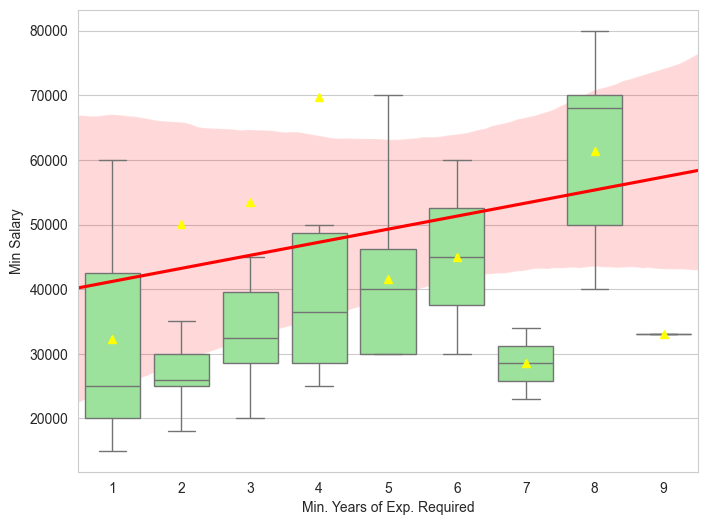

In [52]:
# Boxplot of "Min. Years of Exp. Required" vs. "Min Salary" with outliners removed
df_yoe_min_salary = df_clean[["Min. Years of Exp. Required", "Min Salary"]]
df_yoe_min_salary_nan_removed = df_yoe_min_salary[df_yoe_min_salary["Min Salary"]>0].dropna()

sns.boxplot(x=df_yoe_min_salary_nan_removed["Min. Years of Exp. Required"], y=df_yoe_min_salary_nan_removed["Min Salary"], showmeans=True, meanprops={"markerfacecolor":"yellow", "markeredgecolor":"yellow"}, showfliers=False, color="lightgreen")

sns.regplot(x=df_yoe_min_salary_nan_removed["Min. Years of Exp. Required"], y=df_yoe_min_salary_nan_removed["Min Salary"], scatter=False, truncate=False, color="red")

The yellow triangle indicates the mean (calculated with outliners)

The gray line inside the green box (the Interquartile Range) indicates the median

The red line that spans across the graph indicates the linear regression fit (or the trend of the data)

The light red shaded area at the back of the graph indicates the confidence interval of the linear regression

As there is an upward trending regression line, this indicates that - the higher the "Min . Years of Exp. Required" *generally* means higher "Min Salary".

Notice in the graph above that for yoe 7 and 9, these "Min. Salary"s are especially low and does not follow the upward trend of "higher yoe = higher min salary". This might be due to the fact that job postings that are hiring for more senior-level candidates tends to also be hiring for multiple positions that are more junior under one posting, thus bringing down the "Min Salary" (as well as "Max Salary").

Let's dig deeper into the job postings that are hiring for multiple positions.

In [47]:
# Inspect those that are hiring for multiple positions under one posting
df_multiple_positions = df_clean[(df_clean["Title"].str.contains("/"))|(df_clean["Title"].str.contains(" or "))]
df_multiple_positions.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Posted Date,Job ID,URL,Exact Location,District,Area,Min Salary,Max Salary
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,Information & Communication Technology,2024-07-17 14:00:00,77345435,https://hk.jobsdb.com/job/77345435,Sheung Wan,Central and Western,Hong Kong,0,0
5,Project Executive/ Associate Business Analyst,Million Tech Development Ltd,1,False,Information & Communication Technology,2024-07-17 11:00:00,77339809,https://hk.jobsdb.com/job/77339809,Lai Chi Kok,Sham Shui Po,Kowloon,0,0
6,Data/Business Analyst / Assistant,新宇環保集團有限公司,<NA>,True,Information & Communication Technology,2024-07-17 06:00:00,77322695,https://hk.jobsdb.com/job/77322695,Kowloon Bay,Kwun Tong,Kowloon,15000,19000
9,IT Technology Business Analyst/ ERP Consultant...,Recreate System Limited,0,True,Information & Communication Technology,2024-07-17 06:00:00,77319271,https://hk.jobsdb.com/job/77319271,Sheung Wan,Central and Western,Hong Kong,0,0
12,Business Analyst / IT Development Group / (WFH...,Yusen Logistics Global Management Limited,3,False,Information & Communication Technology,2024-07-17 17:00:00,77350321,https://hk.jobsdb.com/job/77350321,Kwai Hing,Kwai Tsing,New Territories,0,0


In [48]:
# Inspect those that are hiring for multiple position across different career levels under one posting
# "Title" contains the word "senior" and ("Min. Years of Exp. Required" less than 5 [as senior level should be 5 or above] or "Fresh Grad/Less Exp." is True)
df_cross_career_levels = df_clean[["Title", "Company", "Min. Years of Exp. Required", "Fresh Grad/Less Exp."]].dropna()
df_cross_career_levels[df_cross_career_levels["Title"].str.contains("Senior")&((df_cross_career_levels["Min. Years of Exp. Required"] < 5)|(df_cross_career_levels["Fresh Grad/Less Exp."]))].head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.
13,Business Analyst/ Senior Business Analyst,New World Development Co Ltd,2,False
20,(Senior) Digital Business Analyst,AXA Hong Kong,2,False
38,Senior Business Analyst (Digital / Mobile Proj...,Cherrypicks Limited,3,True
47,Senior Project Executive/ Business Analyst (5 ...,Tech Nine Limited,2,True
56,Senior Financial & Business Analyst,International Trading Fashion & Apparel Supply...,4,False


Going back to the box plot above, notice how the means (the yellow triangles) are all over the place?

This brings us the question: __is the mean or the median more reliable in this case?__

We can find out by looking at:

1. a plot with the mean (calculated without outliners) of "Min Salary" against yoe 
2. the distribution of "Min Salary" (and see its skewness)

<Axes: xlabel='Min. Years of Exp. Required', ylabel='Min Salary'>

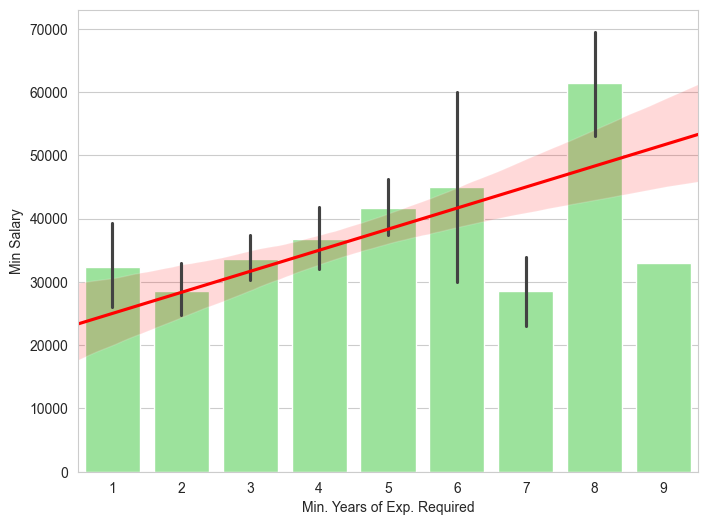

In [55]:
# Mean of "Min. Salary" vs. "Min. Years of Exp. Required" with outliners removed
df_yoe_min_salary_outliners_removed = df_yoe_min_salary_nan_removed[np.abs(stats.zscore((df_yoe_min_salary_nan_removed["Min Salary"]))) < IQR_SCALE].dropna()

sns.barplot(x=df_yoe_min_salary_outliners_removed["Min. Years of Exp. Required"], y=df_yoe_min_salary_outliners_removed["Min Salary"], color="lightgreen")
sns.regplot(x=df_yoe_min_salary_outliners_removed["Min. Years of Exp. Required"], y=df_yoe_min_salary_outliners_removed["Min Salary"], scatter=False, truncate=False, color="red")

According to the graph above, there is a upward trending regression line for "Min. Salary" as the "Min. Years of Exp. Required" increases, though there are some pretty big variability for some yoe's such as 6 and 8.

If we exclude the outliners and calculate the mean using the rest of the data, this proves the statement of "Min . Years of Exp. Required" generally means higher "Min Salary" valid. *Please note that this conclusion should be taken as a grain of salt as again the mean is calculated without the outliners.*

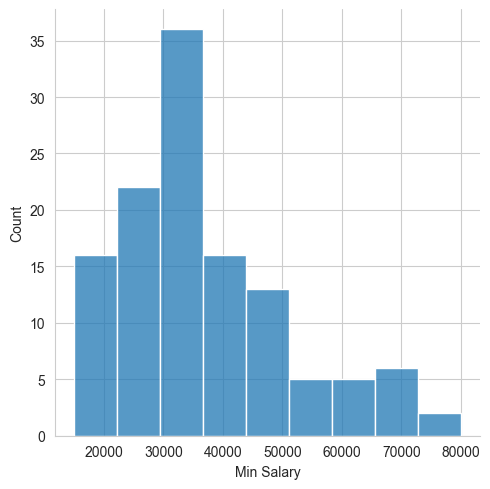

In [56]:
# Distribution of "Min. Salary" with outliners removed
sns.displot(df_yoe_min_salary_outliners_removed["Min Salary"])

According to the distribution graph above, since "Min. Salary" is positively skewed, as well as having outliners in its data, using __median__ as the determining factor for "Min. Salary" would be a better approach as median is more resistant to outliners than the mean.

In [58]:
# Actual numbers of the medians of "Min Salary" (and "Max Salary") vs. "Min. Years of Exp. Required"
df_yoe_min_salary_outliners_removed.groupby("Min. Years of Exp. Required").median().sort_values("Min Salary", ascending=False)

,Min Salary
Min. Years of Exp. Required,
8,68000.00
6,45000.00
5,40000.00
4,35000.00
9,33000.00
3,30000.00
7,28500.00
1,25000.00
2,25000.00


According to the table above, a minimum of 8 yoe would receive the most  salary of HKD\$68,000, followed by 6 yoe with HKD\$45,000 and 5 yoe with HKD\$40,000, while 1 and 2 yoe's would receive the least salary of HKD$\25,000. The reason for some higher yoe's having a lower Min Salary is again likely due to the more senior-level job postings hire for multiple positions under one posting, making the "Min Salary" and "Max Salary" for those posting fluctuate greatly.

However, even with some higher yoe's having a lower Min Salary compared to the ones with a low yoe's, the general upward trend of the higher the yoe, the higher the Min Salary that one would receive still remains valid.

After comparing both the mean and the median of "Min. Salary" with yoe, it was determined that the median provides us with a more reliable measure to accurately describing "Min. Salary" compared to the mean.

__As a result, it is safe to conclude that "Min . Years of Exp. Required" does in fact generally mean higher "Min Salary".__

Next, we want to run a correlation analysis to see if any field has correlation(s) with any other fields.

## Correlation Analysis

In [43]:
# Create a copy of df_clean
df_numerized = copy.deepcopy(df_clean)

# Give all string (object) fields a random int to allow for correlation analysis later
for col in df_numerized.columns:
    if(df_numerized[col].dtype == "object"):
        df_numerized[col] = df_numerized[col].astype("category")
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Posted Date,Job ID,URL,Exact Location,District,Area,Min Salary,Max Salary
0,457,257,5,True,14,64,77344899,1073,2,3,2,0,0
1,213,327,<NA>,False,14,62,77341887,1064,35,11,2,25000,34000
2,276,298,1,False,14,56,76987834,252,-1,10,0,0,0
3,477,190,2,False,14,61,77338381,1051,28,6,1,0,0
4,91,266,3,True,14,64,77345435,1077,39,0,0,0,0


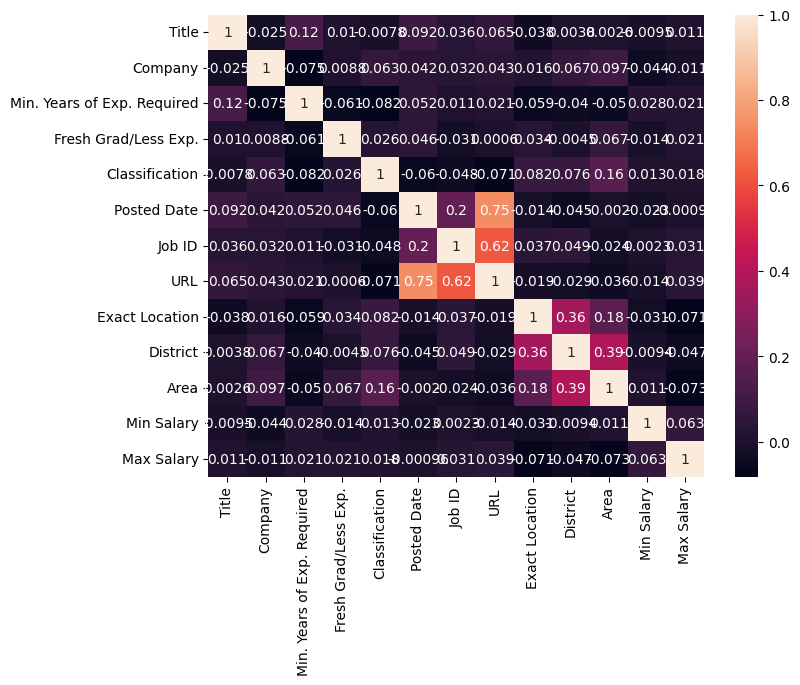

In [44]:
# Run correlation analysis using the df_numerized that we just created and show the result using a heatmap
numerized_corr_matrix = df_numerized.corr(numeric_only=True)
sns.heatmap(numerized_corr_matrix, annot=True)
plt.show()

- "URL" and "Posted Date" have a relatively high correlation because the URL of a Job is derived from its posted date. (this correlation can be omitted)
- "URL" and "JobID" have a relatively high correlation because the URL of a Job contains its Job ID. (omitted)
- "Exact Location" and "District" have a relatively low (but still worth noting) correlation because some exact locations have a similar name to its District such as "Wan Chai"
  
Other than the ones that we have omitted, there is no significant correlation between any two fields.

__A dashboard with visualization of other analyses can be found [here](https://public.tableau.com/app/profile/hei.in.sam/viz/JobMarketInsightsAnalysesontheRoleofBusinessAnalystinHongKong/JobDataAnalyses).__

# Limitations

- The results of this analysis might be outdated if they are being referred in the distant future from the date of scraping.
- Since the input csv only included jobs that matched the keyword "business analyst", this resulted in the input for this analysis being somewhat limited as we are only analyzing "business analyst" jobs. However, there might be some other jobs with completely different job titles that also encompass the same nature and responsbilities of an "business analyst". In the future, to allow for more in-depth analysis of the job market on this job, a more generic keyword that can be interpreted multiple ways such as "analyst" could be used as an input for the scraping program. This way, analysis such as categorizing jobs into a few generic jobs titles (e.g., business analyst, data analyst, data scientist) can be done and more meaningful insights can be uncovered.

# Exporting Cleaned Data

In [45]:
# (Optional) Export the cleaned data to a csv
Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)
df_clean = df_clean[['Title', 'Company', 'Min. Years of Exp. Required',
       'Fresh Grad/Less Exp.', 'Exact Location', 'District', 'Area', 'Classification', 'Min Salary',
       'Max Salary','Posted Date', 'Job ID',
       'URL']]
df_clean.to_csv(f"{OUTPUT_PATH}{csv_file}_transformed.csv", index=False)
print("saved")

saved
